#  Wine Dataset Analysis: PCA & Logistic Regression
#
### This notebook demonstrates:
### 1. **PCA Analysis:** Loading the Wine dataset, standardizing it, applying PCA, and deciding on the number of components based on cumulative explained variance (~95%).
### 2. **Visualization:** Creating 2D and 3D plots of the PCA-transformed data to reveal underlying class structure.
### 3. **Classification:** Building logistic regression models on both the original standardized data and the PCA-transformed data, then comparing their performances.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# %%
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for inspection (optional)
df_wine = pd.DataFrame(X, columns=wine.feature_names)
df_wine['target'] = y
print("Dataset shape:", df_wine.shape)
print(df_wine.head())


Dataset shape: (178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  prol

In [3]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Cecking Basic Info of the dataset

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## Checking for null values in the dataset

In [5]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

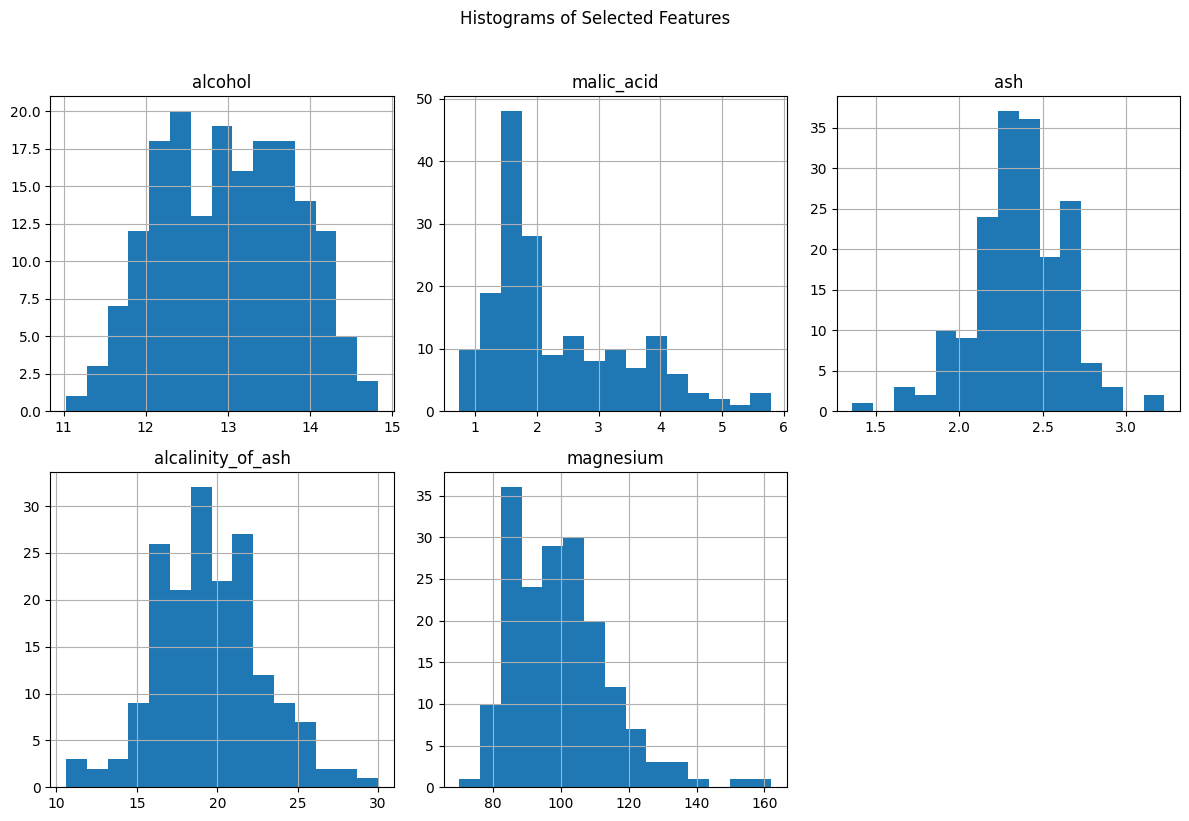

In [6]:
# %%
# Distribution plots for a few features
features_to_plot = wine.feature_names[:5]  # Plotting the first 5 features as an example
df_wine[features_to_plot].hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Histograms of Selected Features', y=1.02)
plt.tight_layout()
plt.show()


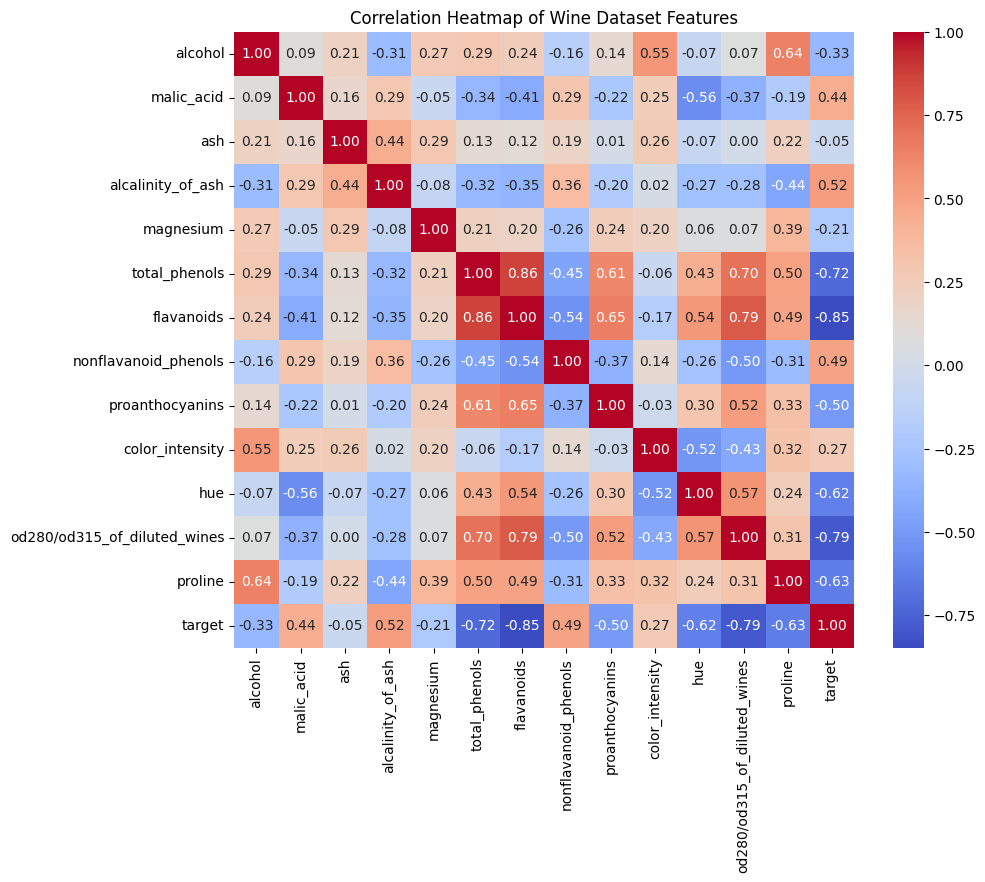

In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_wine.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Dataset Features')
plt.show()



### PCA is sensitive to the scale of the features. We standardize the dataset so that each feature contributes equally to the analysis.


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA Analysis
# 
### We perform PCA to determine how many principal components are needed to capture at least 95% of the variance.
### The steps include:
### - Applying PCA without limiting the number of components.
### - Plotting both the individual and cumulative explained variance.
### - Deciding on the number of components (`k`) where cumulative variance exceeds 95%.


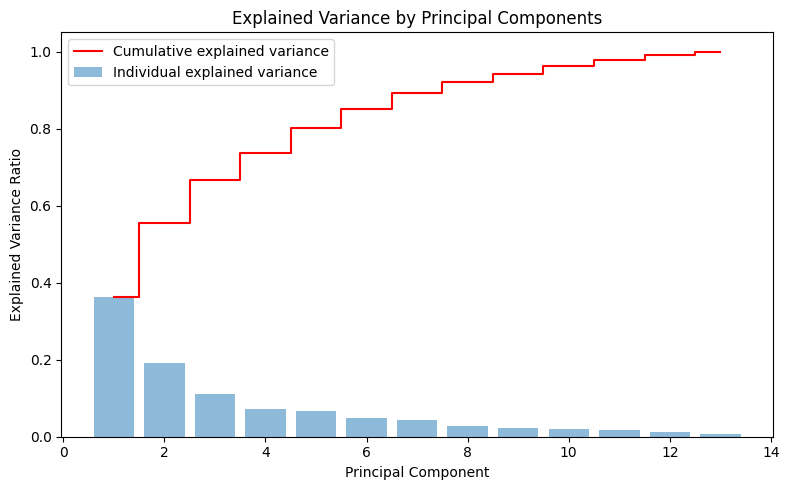

Number of components to retain ~95% variance: 10


In [9]:
# %%
# Apply PCA without limiting components to check explained variance
pca_full = PCA(n_components=X.shape[1])
X_pca_full = pca_full.fit_transform(X_scaled)

# Calculate explained variance ratios and cumulative variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance ratios and cumulative variance
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Decide on the number of components (k) that capture >= 95% variance
k = np.argmax(cumulative_variance >= 0.95) + 1  # +1 for correct component count
print(f"Number of components to retain ~95% variance: {k}")


## Observations
- From the bar chart (blue bars), it is evident that the **first few principal components** capture a large portion of the total variance. As we move to higher‐order components, the individual contribution to variance decreases substantially.  
- The **red step line** represents the cumulative explained variance. It shows that by the **10th principal component**, the cumulative explained variance surpasses the 95% mark.  

## Inference
- Since 10 principal components capture **~95% of the total variance**, we can **reduce the dimensionality** of the original dataset (13 features) down to 10 components while retaining most of the essential information.  
- This dimensionality reduction often helps in **improving computational efficiency**, mitigating overfitting, and **simplifying models** without a substantial loss in predictive power.  



#  Visualization of PCA-Transformed Data
### We now visualize the data:
### - **2D Visualization:** Using the first 2 principal components.
### - **3D Visualization:** Using the first 3 principal components.
### These plots help reveal clusters corresponding to different wine classes.


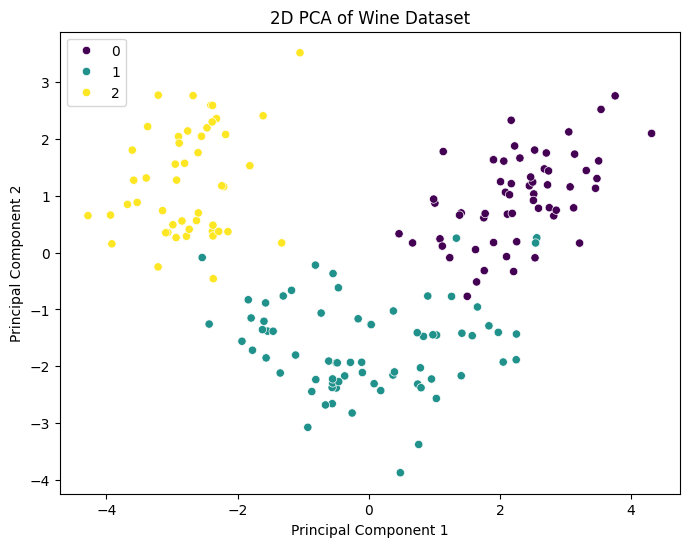

In [10]:
# %%
# 2D Visualization using the first 2 principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='viridis', legend='full')
plt.title('2D PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Observations
- The 2D PCA plot shows three distinct clusters corresponding to the three target classes (labeled **0**, **1**, and **2**).
- The classes appear well-separated along the two principal components, indicating that these components capture meaningful structure in the data.
- Class “0” (teal points) is largely clustered toward the left/bottom side, class “1” (yellow points) is clustered toward the left/top side, and class “2” (purple points) is clustered toward the right side.

## Inference
- Even though the original dataset has higher dimensionality, **just two principal components** are sufficient to visually separate the three classes quite effectively.
- This suggests that the **first two principal components** capture a significant portion of the variance relevant to class distinctions.
- PCA thus provides a convenient **low-dimensional view** of the data, aiding in identifying patterns and cluster structures that might otherwise be less apparent in the original high-dimensional space.


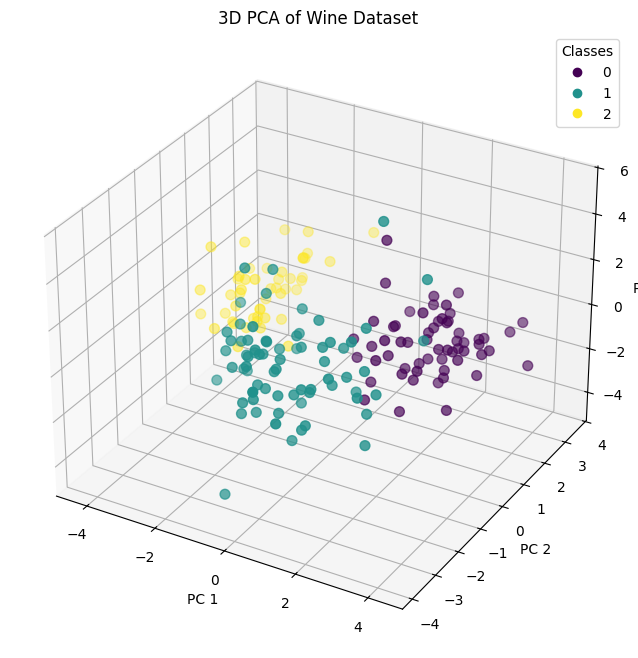

In [11]:
# %%
# 3D Visualization using the first 3 principal components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', s=50)
ax.set_title('3D PCA of Wine Dataset')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


## Observations
- The 3D PCA plot shows that the **three classes** (labeled 0, 1, and 2) form relatively distinct clusters in the space of the first three principal components.
- Class **0** (teal) occupies a region primarily toward the negative side of PC 1, while Class **1** (yellow) clusters more toward the center/top, and Class **2** (purple) is predominantly on the positive side of PC 1.
- The clear separation among the clusters indicates that these principal components effectively capture the variance that distinguishes the wine classes.

## Inference
- **Reducing the dataset** to three principal components still **retains enough information** to visually separate the classes, suggesting strong underlying structure in the data.
- The 3D PCA representation confirms that the **Wine dataset** is inherently well-separated, implying that a variety of classification algorithms could achieve high accuracy.
- This also underscores the utility of **PCA** as a tool for both **visualization** and **dimension reduction**, enabling easier inspection of how classes differ in a lower-dimensional space.


# Logistic Regression Modeling
#
### We build two logistic regression models:
### 1. **Original Data Model:** On the standardized original dataset.
### 2. **PCA-Transformed Data Model:** On the dataset transformed using PCA with `k` components.
### We then compare the performance of these models.


## 1. **Original Data Model:** On the standardized original dataset.

In [12]:
# %%
# Split the standardized original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build Logistic Regression model on the original data
lr_original = LogisticRegression(max_iter=10000, random_state=42)
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

# Evaluate the model on the original data
acc_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on Original Data: {:.2f}%".format(acc_original * 100))
print("\nClassification Report (Original Data):\n", classification_report(y_test, y_pred_original))


Accuracy on Original Data: 98.15%

Classification Report (Original Data):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## 2. **PCA-Transformed Data Model:** On the dataset transformed using PCA with `10` components.

In [13]:
# %%
# Apply PCA with k components (as decided earlier)
pca_k = PCA(n_components=k)
X_pca = pca_k.fit_transform(X_scaled)

# Split the PCA-transformed data (using the same target y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Build Logistic Regression model on PCA-transformed data
lr_pca = LogisticRegression(max_iter=10000, random_state=42)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Evaluate the model on PCA-transformed data
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed Data (using {} components): {:.2f}%".format(k, acc_pca * 100))
print("\nClassification Report (PCA Data):\n", classification_report(y_test, y_pred_pca))


Accuracy on PCA-transformed Data (using 10 components): 98.15%

Classification Report (PCA Data):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Observations
- The original Wine dataset consists of 178 instances and 14 columns (13 features plus the target).
- PCA analysis revealed that **10 principal components** are sufficient to retain approximately 95% of the total variance.
- A Logistic Regression model built on the original standardized data achieved an accuracy of **98.15%**.
- Similarly, a model built on the PCA-transformed data (using the top 10 components) also achieved an accuracy of **98.15%**.
- The classification reports for both models are nearly identical, indicating that the PCA transformation has preserved the critical discriminative information.

## Conclusion
- The PCA transformation effectively reduced the dimensionality of the dataset from 13 features to 10 principal components while retaining nearly all (95%) of the information.
- Since both models yield identical performance metrics, it confirms that the top 10 principal components capture the essential characteristics of the data required for accurate classification.
- Thus, applying PCA in this case simplifies the dataset without sacrificing model performance, providing a useful strategy for reducing complexity and potential overfitting.
